In [45]:
## for loading and preprocessing 
import pandas as pd
import numpy as np 

## for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

## splitting dataset and feature engineering 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import pickle
import joblib

import warnings
warnings.filterwarnings('ignore')

In [46]:
#read dataset
data = pd.read_csv("Housing1.csv")

In [47]:
#create a copy of dataset
df = data.copy()

In [48]:
# View the first rows
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [49]:
# view the last five rows 
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [50]:
## check the number of rows and columns 
print(f'Total number of rows: {df.shape[0]} -> Total number of columns: {df.shape[1]}')

Total number of rows: 545 -> Total number of columns: 13


In [51]:
# get a summary description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [52]:
## checking for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [53]:
## checking for duplicated values 
df.duplicated().sum()

np.int64(0)

In [54]:
#printing column names
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [55]:
#printing unique values for all columns in the dataframe
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())

price
[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  4900000

In [56]:
#Renaming of some columns
df = df.rename(columns={'mainroad':'main_road', 'hotwaterheating':'hotwater_heating',
                          'airconditioning':'air_conditioning', 'prefarea':'pref_area', 'furnishingstatus':'furnishing_status'})

In [57]:
#printing column names
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'main_road',
       'guestroom', 'basement', 'hotwater_heating', 'air_conditioning',
       'parking', 'pref_area', 'furnishing_status'],
      dtype='object')

In [58]:
#Statistical summary of the numeric coulums
df.describe().round()

,price,area,bedrooms,bathrooms,stories,parking
count,545.0,545.0,545.0,545.0,545.0,545.0
mean,4766729.0,5151.0,3.0,1.0,2.0,1.0
std,1870440.0,2170.0,1.0,1.0,1.0,1.0
min,1750000.0,1650.0,1.0,1.0,1.0,0.0
25%,3430000.0,3600.0,2.0,1.0,1.0,0.0
50%,4340000.0,4600.0,3.0,1.0,2.0,0.0
75%,5740000.0,6360.0,3.0,2.0,2.0,1.0
max,13300000.0,16200.0,6.0,4.0,4.0,3.0


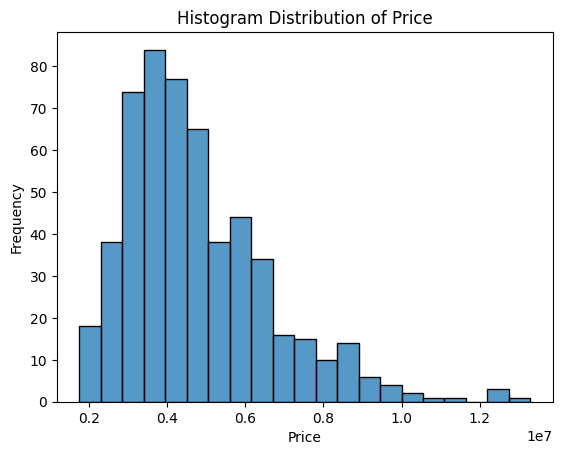

In [59]:
#Finding the distribution of our target variable(price)
sns.histplot(df['price'])

plt.title('Histogram Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

In [60]:
#finding the skewness of the target variable(price)
df['price'].skew()

np.float64(1.2122388370279802)

In [61]:
#Normalising the target variable(price) with the log function
log_price = np.log1p(df['price'])

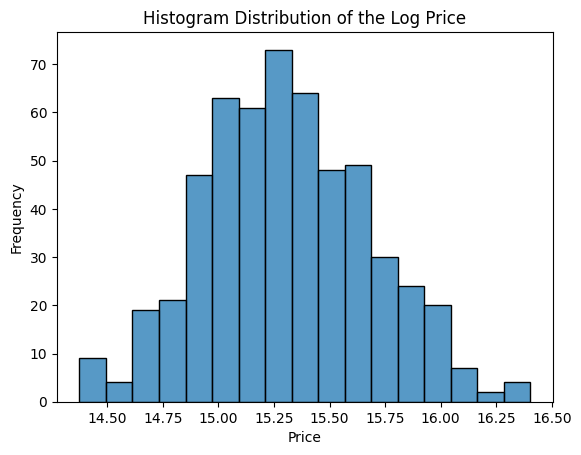

In [62]:
#Finding the distribution of our target variable(price)
sns.histplot(log_price)

plt.title('Histogram Distribution of the Log Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

In [63]:
#finding the skewness of the target variable(price)
df1 = log_price.skew()
df1

np.float64(0.14086281102108905)

In [64]:
#converting the non-merical columns to numerical values. ,

df['main_road'] = df['main_road'].\
map( {'no': 0, 'yes': 1 } ).astype(int)

df['guestroom'] = df['guestroom'].\
map( {'no': 0, 'yes': 1 } ).astype(int)

df['basement'] = df['basement'].\
map( {'no': 0, 'yes': 1 } ).astype(int)

df['hotwater_heating'] = df['hotwater_heating'].\
map( {'no': 0, 'yes': 1 } ).astype(int)

df['air_conditioning'] = df['air_conditioning'].\
map( {'no': 0, 'yes': 1 } ).astype(int)

df['pref_area'] = df['pref_area'].\
map( {'no': 0, 'yes': 1 } ).astype(int)

df['furnishing_status'] = df['furnishing_status'].\
map( {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0 } ).astype(int)


In [65]:
#print of the first rows of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,main_road,guestroom,basement,hotwater_heating,air_conditioning,parking,pref_area,furnishing_status
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [66]:
# checking data type on all columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
main_road            int64
guestroom            int64
basement             int64
hotwater_heating     int64
air_conditioning     int64
parking              int64
pref_area            int64
furnishing_status    int64
dtype: object

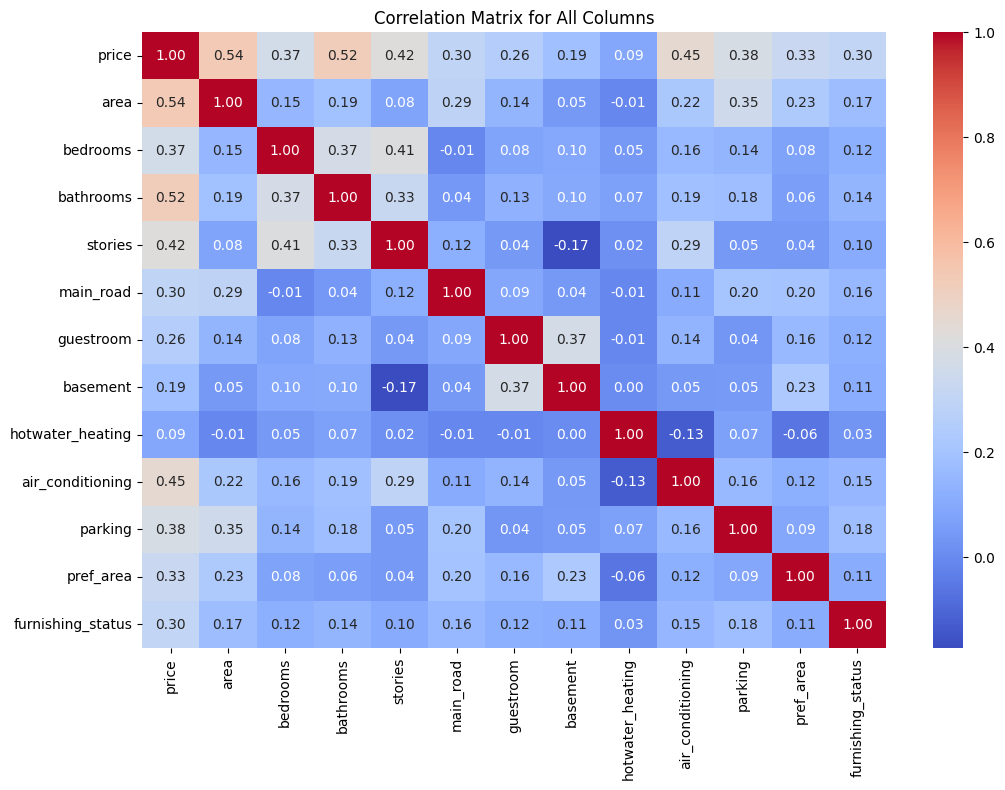

In [67]:
## performing a correlation on all columns

corr_matrix = df.corr()
corr_matrix

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for All Columns')
plt.show()

In [68]:
#correlation matrix of the target variable(price) and the features
corr_matrix['price']

price_corr = corr_matrix['price'].reset_index()
price_corr = price_corr.sort_values(by='price', ascending = False)

fig =px.bar(price_corr, x='index', y='price',
            title = 'The Correlation betweeen Target variable(Price) and the Feature variables',
            labels = {'price':'Price', 'index':'Feature Variables'},
            text_auto = '0.2f')
fig.show()

#This shows that among the features for house price prediction, 'area' has the highest influence on the price of a house, followed by the number of bathrooms.

In [69]:
# finding the relationship between the price and area 

# Fit linear regression model
X = df['area'].values.reshape(-1, 1)
y = df['price'].values
model = LinearRegression()
model.fit(X, y)

# Generate points for the trendline
x_range = np.linspace(df['area'].min(), df['area'].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))

# Create a scatter plot
scatter_plot = go.Scatter(x=df['area'], y=df['price'], mode='markers', 
                          marker=dict(size=8, color='blue', opacity=0.5),
                          name='Price vs. Area')

# Add trendline to the scatter plot
trendline = go.Scatter(x=x_range, y=y_pred, mode='lines', 
                       line=dict(color='red', width=3),
                       name='Trendline')

# Set plot layout
layout = go.Layout(title='Distribution of Price against Area',
                   xaxis=dict(title='Area'),
                   yaxis=dict(title='Price'))

# Create Figure object
fig = go.Figure(data=[scatter_plot, trendline], layout=layout)

fig.show()

#It appears that there is a positive relationship between price and area, thus as the area size for a house increases it results in an increase in its price.

In [70]:

# Group data by the number of bathrooms and calculate the average price for each group
avg_price_by_bathrooms = df.groupby('bathrooms')['price'].mean().reset_index()

# Create bar chart
fig = px.bar(avg_price_by_bathrooms, x ='bathrooms', y='price',
             title='Average Price by Number of Bathrooms',
             labels= {'bathrooms':'Number of Bathrooms', 'price':'Average Price'})


# Show the plot
fig.show()

In [71]:
X = df.drop('price' , axis = 1 )
y = df['price']
# Split data into combined training-validation set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# Further split combined training-validation set into training and validation sets
train_size = 0.75  # 60% of the original data for training
val_size = 0.25    # 20% of the original data for validation

# Calculate the number of samples for training and validation sets
num_train_samples = int(len(X_train_val) * train_size)
num_val_samples = int(len(X_train_val) * val_size)

# Split the combined training-validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, 
                                                  train_size=train_size, 
                                                  random_state=20)

# Verify the sizes of each dataset
print("Training dataset size:", len(X_train))
print("Validation dataset size:", len(X_val))
print("Test dataset size:", len(X_test))


Training dataset size: 327
Validation dataset size: 109
Test dataset size: 109


In [72]:
# Train the logistic regression model using the combined training-validation set
logistic_model = LogisticRegression()
logistic_model.fit(X_train_val, y_train_val)

# Predict on the validation set
logistic_pred_val = logistic_model.predict(X_val)

# Calculate accuracy on the validation set
logistic_accuracy_val = accuracy_score(y_val, logistic_pred_val) * 100
print("Logistic Regression Validation Accuracy:", logistic_accuracy_val)

# Predict on the test set
logistic_pred_test = logistic_model.predict(X_test)

# Calculate accuracy on the test set
logistic_accuracy_test = accuracy_score(y_test, logistic_pred_test) * 100
print("Logistic Regression Test Accuracy:", logistic_accuracy_test)

Logistic Regression Validation Accuracy: 3.669724770642202
Logistic Regression Test Accuracy: 1.834862385321101


In [73]:
# Train the random forest model using the combined training-validation set
random_forest_model = RandomForestClassifier(n_estimators=120)
random_forest_model.fit(X_train_val, y_train_val)

# Predict on the validation set
random_forest_pred_val = random_forest_model.predict(X_val)

# Calculate accuracy on the validation set
random_forest_accuracy_val = accuracy_score(y_val, random_forest_pred_val) * 100
print("Random Forest Validation Accuracy:", random_forest_accuracy_val)

# Predict on the test set
random_forest_pred_test = random_forest_model.predict(X_test)

# Calculate accuracy on the test set
random_forest_accuracy_test = accuracy_score(y_test, random_forest_pred_test) * 100
print("Random Forest Test Accuracy:", random_forest_accuracy_test)

Random Forest Validation Accuracy: 98.1651376146789
Random Forest Test Accuracy: 3.669724770642202


In [74]:
# Train the KNN model using the combined training-validation set
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_val, y_train_val)

# Predict on the validation set
knn_pred_val = knn_model.predict(X_val)

# Calculate accuracy on the validation set
knn_accuracy_val = accuracy_score(y_val, knn_pred_val) * 100
print("KNN Validation Accuracy:", knn_accuracy_val)

# Predict on the test set
knn_pred_test = knn_model.predict(X_test)

# Calculate accuracy on the test set
knn_accuracy_test = accuracy_score(y_test, knn_pred_test) * 100
print("KNN Test Accuracy:", knn_accuracy_test)

KNN Validation Accuracy: 33.02752293577982
KNN Test Accuracy: 0.9174311926605505


In [75]:
# Train the Gaussian Naive Bayes model using the combined training-validation set
naive_bayes_gaussian = GaussianNB()
naive_bayes_gaussian.fit(X_train_val, y_train_val)

# Predict on the validation set
nbg_pred_val = naive_bayes_gaussian.predict(X_val)

# Calculate accuracy on the validation set
nbg_accuracy_val = accuracy_score(y_val, nbg_pred_val) * 100
print("Naive Bayes (Gaussian) Validation Accuracy:", nbg_accuracy_val)

# Predict on the test set
nbg_pred_test = naive_bayes_gaussian.predict(X_test)

# Calculate accuracy on the test set
nbg_accuracy_test = accuracy_score(y_test, nbg_pred_test) * 100
print("Naive Bayes (Gaussian) Test Accuracy:", nbg_accuracy_test)

Naive Bayes (Gaussian) Validation Accuracy: 55.04587155963303
Naive Bayes (Gaussian) Test Accuracy: 0.0


In [76]:
# Train the Support Vector Machine (SVM) model using the combined training-validation set
svc_model = SVC()
svc_model.fit(X_train_val, y_train_val)

# Predict on the validation set
svm_pred_val = svc_model.predict(X_val)

# Calculate accuracy on the validation set
svm_accuracy_val = accuracy_score(y_val, svm_pred_val) * 100
print("Support Vector Machine Validation Accuracy:", svm_accuracy_val)

# Predict on the test set
svm_pred_test = svc_model.predict(X_test)

# Calculate accuracy on the test set
svm_accuracy_test = accuracy_score(y_test, svm_pred_test) * 100
print("Support Vector Machine Test Accuracy:", svm_accuracy_test)

Support Vector Machine Validation Accuracy: 1.834862385321101
Support Vector Machine Test Accuracy: 0.9174311926605505


In [77]:
# Train the Gradient Boosting Classifier (GBC) model using the combined training-validation set
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train_val, y_train_val)

# Predict on the validation set
gbc_pred_val = gbc_model.predict(X_val)

# Calculate accuracy on the validation set
gbc_accuracy_val = accuracy_score(y_val, gbc_pred_val) * 100
print("Gradient Boosting Classifier Validation Accuracy:", gbc_accuracy_val)

# Predict on the test set
gbc_pred_test = gbc_model.predict(X_test)

# Calculate accuracy on the test set
gbc_accuracy_test = accuracy_score(y_test, gbc_pred_test) * 100
print("Gradient Boosting Classifier Test Accuracy:", gbc_accuracy_test)

Gradient Boosting Classifier Validation Accuracy: 75.22935779816514
Gradient Boosting Classifier Test Accuracy: 1.834862385321101


In [78]:
# Define lists to store model names and accuracies
model_name = ['logistic regression', 'random forest', 'K-Nearest Neighbor', 'Naive Base', 'support vector machine', 'Gradient Boosting Classifier']
model_val_accuracies = [logistic_accuracy_val, random_forest_accuracy_val, knn_accuracy_val, nbg_accuracy_val, svm_accuracy_val, gbc_accuracy_val]
model_test_accuracies = [logistic_accuracy_test, random_forest_accuracy_test, knn_accuracy_test, nbg_accuracy_test, svm_accuracy_test, gbc_accuracy_test]

# Create a DataFrame with model names and accuracies
model_df = pd.DataFrame({'Model': model_name, 'Validation Accuracy': model_val_accuracies, 'Test Accuracy' : model_test_accuracies})

# Sort the DataFrame by accuracy in descending order
model_df = model_df.reset_index()
model_df_sorted = model_df.sort_values(by=['Validation Accuracy', 'Test Accuracy'], ascending=[False, False])

# Display the sorted DataFrame
print(model_df_sorted)


   index                         Model  Validation Accuracy  Test Accuracy
1      1                 random forest            98.165138       3.669725
5      5  Gradient Boosting Classifier            75.229358       1.834862
3      3                    Naive Base            55.045872       0.000000
2      2            K-Nearest Neighbor            33.027523       0.917431
0      0           logistic regression             3.669725       1.834862
4      4        support vector machine             1.834862       0.917431


In [79]:
fig =px.bar(model_df_sorted, x=['Validation Accuracy', 'Test Accuracy'], y='Model',
           title= 'Validation and Test Accuracy levels for Each Model',
          labels={'value':'Accuracy Level','Model':'Model'},)
fig.update_layout(barmode='group')
fig.show()

In [80]:
#saving best model to file using pickle

file_name = "Price_Prediction_model.h5"

Price_Prediction_model = pickle.dump(random_forest_model,open(file_name, 'wb'))

In [81]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'main_road', 'guestroom',
       'basement', 'hotwater_heating', 'air_conditioning', 'parking',
       'pref_area', 'furnishing_status'],
      dtype='object')

In [82]:
#loading saved model for prediction
model_filename = "Price_Prediction_model.h5"

Price_Prediction_model = pickle.load(open(model_filename, 'rb'))
#'area':any number, 'bedrooms':1-6 , 'bathrooms':1-4, 'stories':1-4, 'main_road':0,1, 'guestroom':0,1,
#'basement':0,1, 'hotwater_heating':0,1, 'air_conditioning':0,1, 'parking':0-3,
#'pref_area':0,1, 'furnishing_status':0,1,2

#sample from housing.csv, excel(spreadsheet) row 2
values=[7420,4,2,3,1,0,0,0,1,2,1,2]
df=pd.DataFrame([values])
df.columns=X_train.columns
#df
result = Price_Prediction_model.predict(df)

result[0]



np.int64(13300000)

In [85]:
#compressing the model
import joblib

file_name = "Price_Prediction_model_compressed.pkl"

# Save with compression
joblib.dump(random_forest_model, file_name, compress=3)  # You can use compress=1 to 9 (higher means more compression)

['Price_Prediction_model_compressed.pkl']

In [86]:
# Load the compressed model
file_name = "Price_Prediction_model_compressed.pkl"
Price_Prediction_model = joblib.load(file_name)

# Example usage: Predict with loaded model
# 'area': any number, 'bedrooms': 1-6, 'bathrooms': 1-4, 'stories': 1-4, 'main_road': 0 or 1,
# 'guestroom': 0 or 1, 'basement': 0 or 1, 'hotwater_heating': 0 or 1, 'air_conditioning': 0 or 1,
# 'parking': 0-3, 'pref_area': 0 or 1, 'furnishing_status': 0, 1, or 2

# Sample input data
values = [7420, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1, 2]
df = pd.DataFrame([values], columns=X_train.columns)

# Make predictions
result = Price_Prediction_model.predict(df)
print("Prediction:", result[0])

Prediction: 13300000
